In [1]:
# Importing Libarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('original.csv')

In [3]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [5]:
data.shape

(2000, 5)

In [6]:
data['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

In [7]:
y=data['default']
x=data.drop(columns=['default','clientid'],axis=1)

In [8]:
x

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [9]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 2000, dtype: int64

In [10]:
x.isnull().sum()

income    0
age       3
loan      0
dtype: int64

In [11]:
x['age'].fillna(x['age'].mean(),inplace=True)

In [12]:
x.isnull().sum()

income    0
age       0
loan      0
dtype: int64

# Under Sampling

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
Dtree=DecisionTreeClassifier()

In [16]:
Dtree.fit(x,y)

DecisionTreeClassifier()

In [17]:
y.value_counts()

0    1717
1     283
Name: default, dtype: int64

Text(0, 0.5, 'frequency')

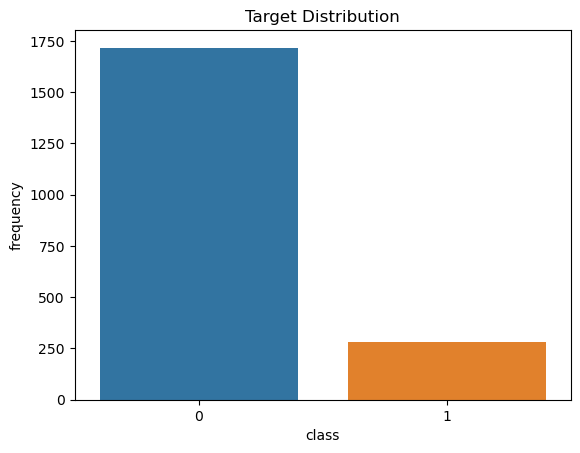

In [18]:
sns.countplot(x=y,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [19]:
from imblearn.under_sampling import RandomUnderSampler

In [20]:
us=RandomUnderSampler(random_state=0)

In [21]:
x_res,y_res=us.fit_resample(x,y)

In [22]:
x_res

,income,age,loan
0,66078.769350,45.536325,3664.621452
1,40654.892537,55.496853,4755.825280
2,65000.819617,21.699700,1114.914824
3,37895.181733,54.515149,6071.340205
4,53033.864130,38.457560,10427.470503
...,...,...,...
561,22800.796775,28.198257,3740.900936
562,21982.017374,34.915516,4265.173704
563,64466.760138,33.327144,8537.369666
564,43662.092688,25.252609,7269.596897


In [23]:
y_res.value_counts()

0    283
1    283
Name: default, dtype: int64

Text(0, 0.5, 'frequency')

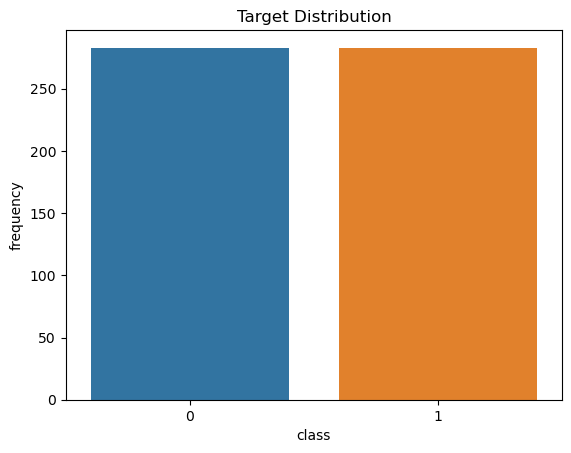

In [24]:
sns.countplot(x=y_res,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

# Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
os=RandomOverSampler(random_state=0)

In [27]:
x_res2,y_res2=os.fit_resample(x,y)

In [28]:
y_res2.value_counts()

0    1717
1    1717
Name: default, dtype: int64

Text(0, 0.5, 'frequency')

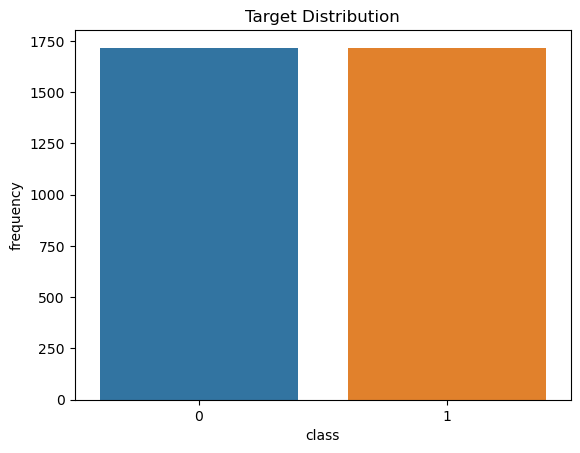

In [29]:
sns.countplot(x=y_res2,data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [30]:
p=Dtree.predict(x_res2)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(p,y_res2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1717
           1       1.00      1.00      1.00      1717

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434



# SMOTE

In [33]:
data=pd.read_csv('original.csv')

In [34]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [35]:
y=data['default']
x=data.drop(columns=['default','clientid'],axis=1)

In [36]:
x['age'].fillna(x['age'].mean(),inplace=True)

In [37]:
x.shape


(2000, 3)

In [38]:
y.value_counts()

0    1717
1     283
Name: default, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote=SMOTE()

In [41]:
x_res2,y_res2=smote.fit_resample(x,y)

In [42]:
print(y.value_counts())
print(y_res2.value_counts())

0    1717
1     283
Name: default, dtype: int64
0    1717
1    1717
Name: default, dtype: int64


In [43]:
p=Dtree.predict(x_res2)

In [44]:
print(classification_report(p,y_res2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1723
           1       1.00      1.00      1.00      1711

    accuracy                           1.00      3434
   macro avg       1.00      1.00      1.00      3434
weighted avg       1.00      1.00      1.00      3434

